In [3]:
import numpy as np
import background as bac
import matplotlib.pyplot as plt
import matplotlib as mpl

from pathlib import Path
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,5)
cwd=os.getcwd()

In [2]:
path_hu = cwd + '/data/hubel.dat'
hub_file = Path(path_hu)
if hub_file.is_file():
    hub = np.genfromtxt(path_hu)
    z_obs = hub[:,0]
    H_obs = hub[:,1]
    dH_obs = hub[:,2]
    print("Hubble data are loaded")
    
else:
    print("Hubble files do not exist")
    sys.exit(0) 

Hubble data are loaded


In [7]:
def xi2_Hub(H0,om):
    H_th = bac.Hubble(z_obs,[H0,om])
    x = ( H_th - H_obs)/dH_obs 
    return pm.math.dot(x,x)  

def log_likelihood(H0,om):
    return -0.5*( xi2_Hub(H0,om)  )    

In [9]:
import theano.tensor as t
import theano
import pymc3 as pm

# model specifications in PyMC3 are wrapped in a with-statement
with pm.Model() as model:
    # Define priors
    om = pm.Uniform('Omega_m', lower=0.1, upper=0.4)
    H0 = pm.Uniform('H0', lower=60, upper=80)
    
    like = pm.Potential('like', log_likelihood(H0,om))

    #step = pm.Metropolis()
    #step = pm.Slice()
    #step = pm.hmc.HamiltonianMC()
    # Inference!
    trace = pm.sample(15000,tune=1500, cores=2,chains=2)   

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [H0, Omega_m]


Sampling 2 chains for 1_500 tune and 15_000 draw iterations (3_000 + 30_000 draws total) took 32 seconds.


/home/ahmad/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Omega_m   0.237  0.015   0.208    0.265      0.000    0.000    7870.0  7822.0   
H0       72.077  1.060  70.116   74.098      0.012    0.008    8017.0  8017.0   

         ess_bulk  ess_tail  r_hat  
Omega_m    7908.0   10023.0    1.0  
H0         8020.0   10804.0    1.0  
xi2_best = 30.594706957684586
om_best = 0.23651590437606154
H0_best = 72.07682418508375
/home/ahmad/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and l

array([[<AxesSubplot:title={'center':'Omega_m'}>,
        <AxesSubplot:title={'center':'Omega_m'}>],
       [<AxesSubplot:title={'center':'H0'}>,
        <AxesSubplot:title={'center':'H0'}>]], dtype=object)

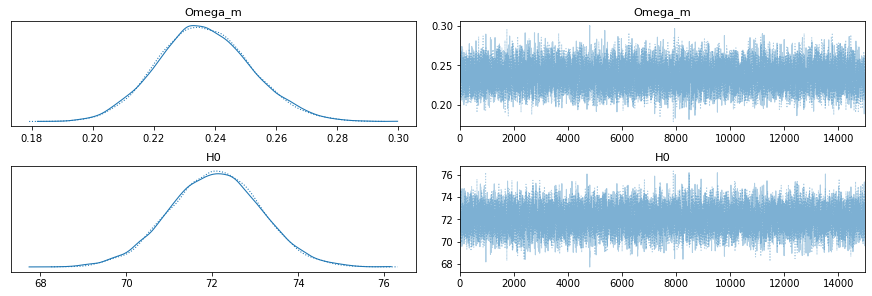

In [10]:
logp = model.logp
lnp = np.array([logp(trace.point(i,chain=c)) for c in trace.chains for i in range(len(trace))])
xi2_best = np.amin(-2*lnp)
om_best = np.mean(trace['Omega_m'])
H0_best = np.mean(trace['H0'])
print(pm.summary(trace))
print("xi2_best =",xi2_best)
print("om_best =",om_best)
print("H0_best =",H0_best)
pm.traceplot(trace)

In [11]:
import theano.tensor as t
import theano
import pymc3 as pm

# model specifications in PyMC3 are wrapped in a with-statement
with pm.Model() as model:
    # Define priors
    om = pm.Uniform('Omega_m', lower=0.1, upper=0.4)
    H0 = pm.Uniform('H0', lower=60, upper=80)
    
    like = pm.Potential('like', log_likelihood(H0,om))

    step = pm.Metropolis()
    #step = pm.hmc.HamiltonianMC()
    #step = pm.Slice()
    # Inference!
    trace = pm.sample(15000,tune=1500, cores=2,chains=2,step=step)   

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [H0]
>Metropolis: [Omega_m]


Sampling 2 chains for 1_500 tune and 15_000 draw iterations (3_000 + 30_000 draws total) took 32 seconds.
The number of effective samples is smaller than 10% for some parameters.


/home/ahmad/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Omega_m   0.236  0.015   0.208    0.264      0.000    0.000    1153.0  1153.0   
H0       72.092  1.052  70.111   73.987      0.031    0.022    1129.0  1129.0   

         ess_bulk  ess_tail  r_hat  
Omega_m    1157.0    1958.0    1.0  
H0         1133.0    2029.0    1.0  
xi2_best = 30.59477484865792
om_best = 0.23636046458543145
H0_best = 72.09224852177609
/home/ahmad/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and le

array([[<AxesSubplot:title={'center':'Omega_m'}>,
        <AxesSubplot:title={'center':'Omega_m'}>],
       [<AxesSubplot:title={'center':'H0'}>,
        <AxesSubplot:title={'center':'H0'}>]], dtype=object)

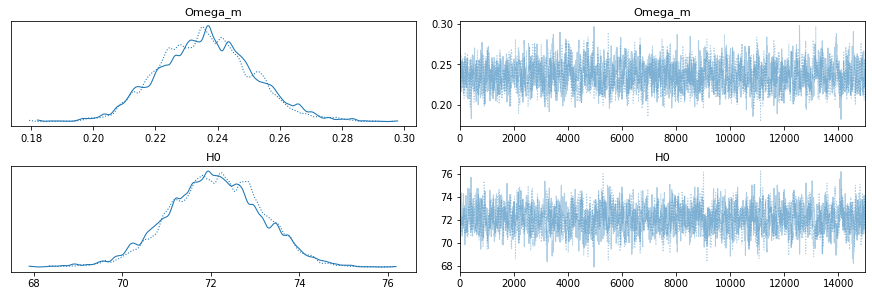

In [12]:
logp = model.logp
lnp = np.array([logp(trace.point(i,chain=c)) for c in trace.chains for i in range(len(trace))])
xi2_best = np.amin(-2*lnp)
om_best = np.mean(trace['Omega_m'])
H0_best = np.mean(trace['H0'])
print(pm.summary(trace))
print("xi2_best =",xi2_best)
print("om_best =",om_best)
print("H0_best =",H0_best)
pm.traceplot(trace)

In [13]:
import theano.tensor as t
import theano
import pymc3 as pm

# model specifications in PyMC3 are wrapped in a with-statement
with pm.Model() as model:
    # Define priors
    om = pm.Uniform('Omega_m', lower=0.1, upper=0.4)
    H0 = pm.Uniform('H0', lower=60, upper=80)
    
    like = pm.Potential('like', log_likelihood(H0,om))

    #step = pm.Metropolis()
    #step = pm.hmc.HamiltonianMC()
    step = pm.Slice()
    # Inference!
    trace = pm.sample(15000,tune=1500, cores=2,chains=2,step=step)   

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Slice: [H0]
>Slice: [Omega_m]


Sampling 2 chains for 1_500 tune and 15_000 draw iterations (3_000 + 30_000 draws total) took 33 seconds.
The number of effective samples is smaller than 25% for some parameters.


/home/ahmad/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/home/ahmad/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Omega_m   0.237  0.015   0.209    0.265      0.000    0.000    6386.0  6359.0   
H0       72.059  1.037  70.076   73.934      0.013    0.009    6491.0  6491.0   

         ess_bulk  ess_tail  r_hat  
Omega_m    6414.0   10302.0    1.0  
H0      

array([[<AxesSubplot:title={'center':'Omega_m'}>,
        <AxesSubplot:title={'center':'Omega_m'}>],
       [<AxesSubplot:title={'center':'H0'}>,
        <AxesSubplot:title={'center':'H0'}>]], dtype=object)

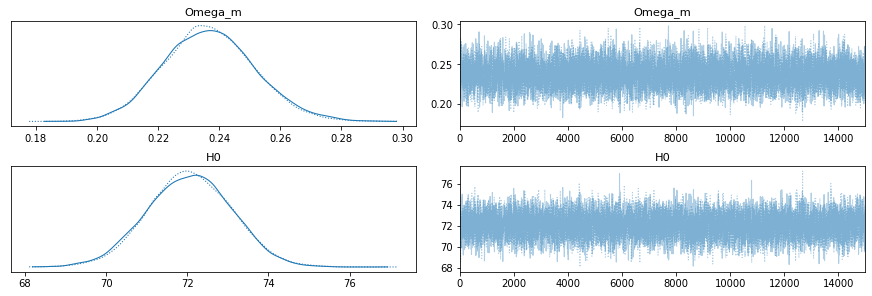

In [14]:
logp = model.logp
lnp = np.array([logp(trace.point(i,chain=c)) for c in trace.chains for i in range(len(trace))])
xi2_best = np.amin(-2*lnp)
om_best = np.mean(trace['Omega_m'])
H0_best = np.mean(trace['H0'])
print(pm.summary(trace))
print("xi2_best =",xi2_best)
print("om_best =",om_best)
print("H0_best =",H0_best)
pm.traceplot(trace)

In [15]:
import theano.tensor as t
import theano
import pymc3 as pm

# model specifications in PyMC3 are wrapped in a with-statement
with pm.Model() as model:
    # Define priors
    om = pm.Uniform('Omega_m', lower=0.1, upper=0.4)
    H0 = pm.Uniform('H0', lower=60, upper=80)
    
    like = pm.Potential('like', log_likelihood(H0,om))

    #step = pm.Metropolis()
    step = pm.hmc.HamiltonianMC()
    #step = pm.Slice()
    # Inference!
    trace = pm.sample(15000,tune=1500, cores=2,chains=2,step=step)   

Multiprocess sampling (2 chains in 2 jobs)
HamiltonianMC: [H0, Omega_m]


Sampling 2 chains for 1_500 tune and 15_000 draw iterations (3_000 + 30_000 draws total) took 33 seconds.
The acceptance probability does not match the target. It is 0.8022901132424903, but should be close to 0.65. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.863744328374511, but should be close to 0.65. Try to increase the number of tuning steps.


/home/ahmad/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Omega_m   0.237  0.015   0.209    0.265      0.000    0.000    8531.0  8505.0   
H0       72.068  1.041  70.182   74.082      0.011    0.008    8582.0  8582.0   

         ess_bulk  ess_tail  r_hat  
Omega_m    8564.0   13371.0    1.0  
H0         8579.0   14890.0    1.0  
xi2_best = 30.59470569458138
om_best = 0.23660021413019156
H0_best = 72.06840734534677
/home/ahmad/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and le

array([[<AxesSubplot:title={'center':'Omega_m'}>,
        <AxesSubplot:title={'center':'Omega_m'}>],
       [<AxesSubplot:title={'center':'H0'}>,
        <AxesSubplot:title={'center':'H0'}>]], dtype=object)

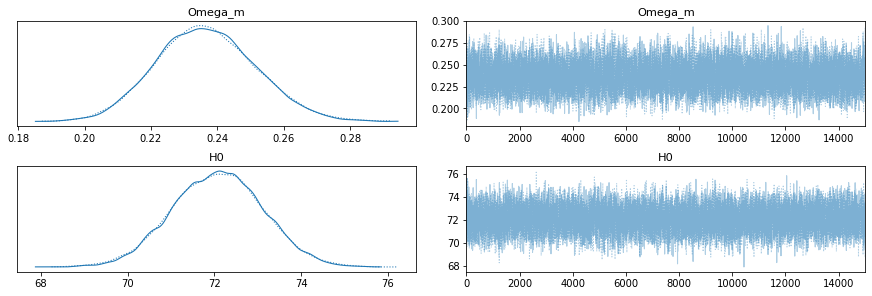

In [16]:
logp = model.logp
lnp = np.array([logp(trace.point(i,chain=c)) for c in trace.chains for i in range(len(trace))])
xi2_best = np.amin(-2*lnp)
om_best = np.mean(trace['Omega_m'])
H0_best = np.mean(trace['H0'])
print(pm.summary(trace))
print("xi2_best =",xi2_best)
print("om_best =",om_best)
print("H0_best =",H0_best)
pm.traceplot(trace)